In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import time
import os as os
from itertools import product
import scipy.stats as ss

In [2]:
df = pd.read_csv('dataset_SCL.csv')

/Users/leonelvenegaskerbs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#PREGUNTA 1

In [4]:
#Pregunta 1

#Puesto que son datos categóricos, no podemos referirnos a una distribución estadística propiamente tal
#Ahora bien, podemos estudiar los histogramas de las variables para tener una primera visualización de cómo están
#conformados los datos.



In [5]:
#Pregunta 1

#Comenzamos viendo la temporalidad de los datos

df['MES'].value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

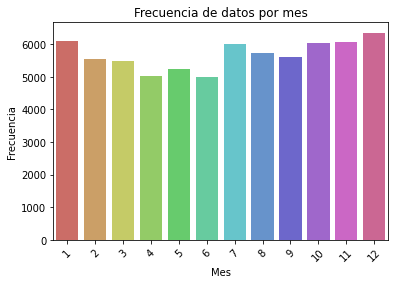

In [6]:
sn.countplot(x='MES',data=df,palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=45)
plt.title('Frecuencia de datos por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

plt.show()

In [7]:
df['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

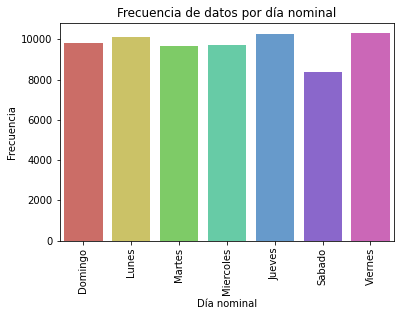

In [8]:
sn.countplot(x='DIANOM',data=df,palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=90)
plt.title('Frecuencia de datos por día nominal')
plt.xlabel('Día nominal')
plt.ylabel('Frecuencia')

plt.show()

In [9]:
#Pregunta 1

#Vemos que la frecuencia de datos por mes es similar, aunque no del todo homogenea.
#Pero sí lo es en términos de días nominales



In [10]:
#Pregunta 1

#Continuamos analizando los datos en términos de aerolíneas contenidas en la muestra



df['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Air France                    358
Delta Air                     358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

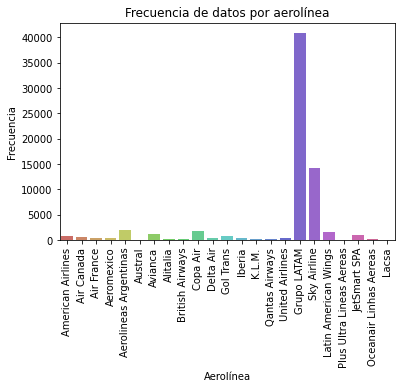

In [11]:
sn.countplot(x='OPERA',data=df,palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=90)
plt.title('Frecuencia de datos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Frecuencia')

plt.show()

In [12]:
#Pregunta 1

#Podemos obsvervar que si bien los datos son públicos y reales, corresponden mayormente a vuelos operados por
#Grupo LATAM, por lo que los resultados de la probabilidad de atraso de los vuelos que aterrizan o despegan del 
#aeropuerto de Santiago de Chile estarán influenciados mayormente por la calidad de operación de LATAM 
#Por lo tanto, el ajuste de los datos será mejor para datos provenientes de este Grupo en comparación a otras
#aerolíneas que operan en el aeropuerto de Santiago.

In [13]:
#Pregunta 1

#Por último, analizamos los datos según tipo de vuelo y destino



df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

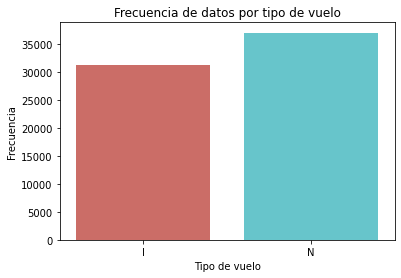

In [14]:
sn.countplot(x='TIPOVUELO',data=df,palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=0)
plt.title('Frecuencia de datos por tipo de vuelo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Frecuencia')

plt.show()

In [15]:
#Pregunta 1

#Vemos que la mayoría de los datos contenidos en la muestra corresponden a vuelos nacionales.
#Esto podría influenciar los resultados de la probabilidad de atraso en el sentido de que
#los procesos nacionales tanto desde el lado de la aerolínea como del cliente deberían ser menos exigentes
#y más rápidos en comparación a un vuelo internacional que depende de regulaciones externas.

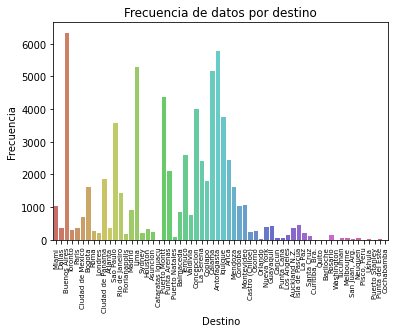

In [16]:
sn.countplot(x='SIGLADES',data=df,palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=90,labelsize=7)

plt.title('Frecuencia de datos por destino')
plt.xlabel('Destino')
plt.ylabel('Frecuencia')

plt.show()

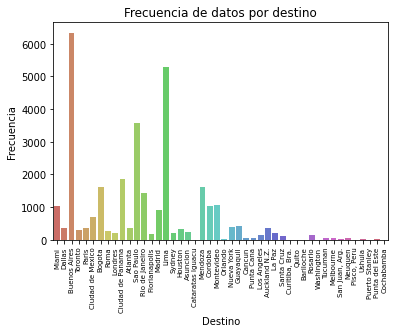

In [17]:
sn.countplot(x='SIGLADES',data=df.loc[df['TIPOVUELO'] == 'I'],palette='hls')
ax = plt.gca()
plt.draw()
ax.tick_params(axis='x', labelrotation=90,labelsize=7)

plt.title('Frecuencia de datos por destino')
plt.xlabel('Destino')
plt.ylabel('Frecuencia')

plt.show()

In [18]:
#Pregunta 1

#Ahora bien, dentro de los vuelos internacionales, la mayoría tienen como destino Buenos Aires, Lima y Sao Paulo.
#Es decir, todos destinos dentro de Latinoamérica, y con distancias relativamente cortas.
#Esto también podría influenciar la probabilidad de atraso, dados los acuerdos comerciales en Latinoamérica,
#la presencia de las aerolíneas en esta región, y los factores operativos como carga de combustible y preparación
#de comidas en comparación a vuelos internacionales de distancias más largas.

In [19]:
#PREGUNTA 2

In [20]:
#pregunta 2
#variable dif_min

#Transformamos las variables en formato fecha estandarizado

df[["Fecha-O", "Fecha-I"]] = df[["Fecha-O", "Fecha-I"]].apply(pd.to_datetime)

#Obtenemos la diferencia entre fechas, lo transformamos a escala de minutos, y creamos la variable "dif_min"

df["dif_min"]=df["Fecha-O"]-df["Fecha-I"]

df['dif_min'] = df['dif_min'] / pd.Timedelta(minutes=1)

In [21]:
#pregunta 2
#variable atraso_15

#Aplicamos la condición requerida para crear la variable "atraso_15"

df["atraso_15"] = df["dif_min"].apply(lambda x: 1 if x > 15 else 0)


In [22]:
#pregunta 2
#variable temporada_alta

#vemos los años contenidos en los datos
df.AÑO.unique()

array([2017, 2018])

In [23]:
#pregunta 2
#variable temporada_alta

#Luego construimos las ventanas de tiempo para crear la variable de acuerdo a las condiciones de fecha

start_date1 = pd.to_datetime('15 dec 2016')
end_date1 = pd.to_datetime('3 mar 2017')
start_date2 = pd.to_datetime('15 jul 2017')
end_date2 = pd.to_datetime('31 jul 2017')
start_date3 = pd.to_datetime('11 sep 2017')
end_date3 =pd.to_datetime('30 sep 2017')
start_date4 = pd.to_datetime('15 dec 2017')
end_date4 = pd.to_datetime('3 mar 2018')
start_date5 = pd.to_datetime('15 jul 2018')
end_date5 = pd.to_datetime('31 jul 2018')
start_date6 = pd.to_datetime('11 sep 2018')
end_date6 =pd.to_datetime('30 sep 2018')
start_date7 = pd.to_datetime('15 dec 2018')
end_date7 = pd.to_datetime('3 mar 2019')

#Especificamos las condiciones

condition1=df["temporada_alta"]=df["Fecha-I"].between(start_date1,end_date1, inclusive=True)
condition2=df["temporada_alta"]=df["Fecha-I"].between(start_date2,end_date2, inclusive=True)
condition3=df["temporada_alta"]=df["Fecha-I"].between(start_date3,end_date3, inclusive=True)
condition4=df["temporada_alta"]=df["Fecha-I"].between(start_date4,end_date4, inclusive=True)
condition5=df["temporada_alta"]=df["Fecha-I"].between(start_date5,end_date5, inclusive=True)
condition6=df["temporada_alta"]=df["Fecha-I"].between(start_date6,end_date6, inclusive=True)
condition7=df["temporada_alta"]=df["Fecha-I"].between(start_date7,end_date7, inclusive=True)

#Creamos la variable "temporada_alta"

df.loc[(df['Fecha-I'].between(start_date1,end_date1, inclusive=True))| (df['Fecha-I'].between(start_date2,end_date2, inclusive=True))| (df['Fecha-I'].between(start_date3,end_date3, inclusive=True))| (df['Fecha-I'].between(start_date4,end_date4, inclusive=True))|(df['Fecha-I'].between(start_date5,end_date5, inclusive=True))|(df['Fecha-I'].between(start_date6,end_date6, inclusive=True))|(df['Fecha-I'].between(start_date7,end_date7, inclusive=True)),'temporada_alta'] = 1  

f = lambda x: 0 if x==False else 1
df['temporada_alta'] = df['temporada_alta'].map(f)


In [24]:
#pregunta 2
#variable periodo_dia

#Creamos las ventanas de tiempo de acuerdo a las categorías requeridas para la variable

start_time1 = time(5,0,0)
end_time1 = time(11,59,0)

start_time2 = time(12,0,0)
end_time2 = time(18,59,0)

start_time3 = time(19,0,0)
end_time3 = time(4,59,0)

#Obtenemos el tiempo de la variable "Fecha"

df["time"] = df['Fecha-I'].dt.time

#Especificamos las condiciones y creamos la variable "periodo_dia"


df.loc[(df['time'] >= start_time1) & (df['time'] <= end_time1), 'periodo_dia'] = 'mañana'
df.loc[(df['time'] >= start_time2) & (df['time'] <= end_time2), 'periodo_dia'] = 'tarde'  
df.loc[(df['time'] >= start_time3), 'periodo_dia'] = 'noche'
df.loc[(df['time'] <= end_time3), 'periodo_dia'] = 'noche'


In [25]:
#pregunta 2
# exportar columnas de interés

synthetic_features = df[['temporada_alta','dif_min','atraso_15','periodo_dia']]
synthetic_features.to_csv('synthetic_features.csv')

In [26]:
#PREGUNTA 3

In [27]:
#Pregunta 3
#Supuesto: Consideramos atraso si la diferencia entre vuelo programado y operado es mayor a 15 minutos

In [28]:
#Pregunta 3
#Calculamos tasa de atraso como (vuelos con atraso/total de vuelos) para cada categoría requerida


#tasa de atraso por destino
df.groupby('SIGLADES')['atraso_15'].mean()

SIGLADES
Antofagasta      0.146388
Arica            0.135468
Asuncion         0.284483
Atlanta          0.058659
Auckland N.Z.    0.373961
                   ...   
Toronto          0.314488
Tucuman          0.263158
Ushuia           0.666667
Valdivia         0.155378
Washington       0.000000
Name: atraso_15, Length: 62, dtype: float64

In [29]:
#Pregunta 3
#tasa de atraso por aerolinea
df.groupby('OPERA')['atraso_15'].mean()

OPERA
Aerolineas Argentinas       0.240123
Aeromexico                  0.028490
Air Canada                  0.456637
Air France                  0.083799
Alitalia                    0.111969
American Airlines           0.067371
Austral                     0.202703
Avianca                     0.265625
British Airways             0.141463
Copa Air                    0.062703
Delta Air                   0.058659
Gol Trans                   0.356079
Grupo LATAM                 0.178666
Iberia                      0.099448
JetSmart SPA                0.178995
K.L.M.                      0.083665
Lacsa                       0.119565
Latin American Wings        0.406810
Oceanair Linhas Aereas      0.154122
Plus Ultra Lineas Aereas    0.612245
Qantas Airways              0.579487
Sky Airline                 0.177647
United Airlines             0.050746
Name: atraso_15, dtype: float64

In [30]:
#Pregunta 3
#tasa de atraso por mes
df.groupby('MES')['atraso_15'].mean()

MES
1     0.160118
2     0.151591
3     0.115104
4     0.116534
5     0.157824
6     0.171050
7     0.293391
8     0.173398
9     0.172371
10    0.225962
11    0.197204
12    0.254091
Name: atraso_15, dtype: float64

In [31]:
#Pregunta 3
#tasa de atraso por día de semana
df.groupby('DIANOM')['atraso_15'].mean()

DIANOM
Domingo      0.161086
Jueves       0.199493
Lunes        0.202152
Martes       0.169116
Miercoles    0.170850
Sabado       0.163194
Viernes      0.222017
Name: atraso_15, dtype: float64

In [32]:
#Pregunta 3
#tasa de atraso por temporada
df.groupby('temporada_alta')['atraso_15'].mean()

temporada_alta
0    0.179454
1    0.196299
Name: atraso_15, dtype: float64

In [33]:
#Pregunta 3
#tasa de atraso por tipo de vuelo
df.groupby('TIPOVUELO')['atraso_15'].mean()

TIPOVUELO
I    0.225608
N    0.150571
Name: atraso_15, dtype: float64

In [34]:
#Pregunta 3

#Para evaluar cuáles de las categorías planteadas esperaríamos que fueran variables que influeyeran
#en predecir atrasos, calculamos la correlación para variables categóricas
#En otras palabras, usamos test Chi square


#También hemos agregado la variable periodo_dia" en el test, puesto que a priori hace sentido que 
#la probabilidad de atraso sea diferente si es que hay diferencias en el volumen de vuelos por período del día

#Correlación de variables categóricas
subset = df[["SIGLADES", "OPERA","MES","DIANOM","temporada_alta","TIPOVUELO","periodo_dia","atraso_15"]]
cat_1 = ("SIGLADES", "OPERA","MES","DIANOM","temporada_alta","TIPOVUELO","periodo_dia","atraso_15")
cat_2 = ("SIGLADES", "OPERA","MES","DIANOM","temporada_alta","TIPOVUELO","periodo_dia","atraso_15")
cat_prod = list(product(cat_1,cat_2, repeat = 1))

result = []
for i in cat_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            subset[i[0]], subset[i[1]])))[1]))
result

[('SIGLADES', 'OPERA', 0.0),
 ('SIGLADES', 'MES', 5.464585853613318e-154),
 ('SIGLADES', 'DIANOM', 0.0),
 ('SIGLADES', 'temporada_alta', 1.3268337723777273e-63),
 ('SIGLADES', 'TIPOVUELO', 0.0),
 ('SIGLADES', 'periodo_dia', 0.0),
 ('SIGLADES', 'atraso_15', 0.0),
 ('OPERA', 'SIGLADES', 0.0),
 ('OPERA', 'MES', 0.0),
 ('OPERA', 'DIANOM', 3.471237609128316e-67),
 ('OPERA', 'temporada_alta', 5.872549315023724e-10),
 ('OPERA', 'TIPOVUELO', 0.0),
 ('OPERA', 'periodo_dia', 0.0),
 ('OPERA', 'atraso_15', 0.0),
 ('MES', 'SIGLADES', 5.464585853613318e-154),
 ('MES', 'OPERA', 0.0),
 ('MES', 'DIANOM', 8.870035590468543e-120),
 ('MES', 'temporada_alta', 0.0),
 ('MES', 'TIPOVUELO', 9.96644190674687e-09),
 ('MES', 'periodo_dia', 2.558150381729716e-13),
 ('MES', 'atraso_15', 3.258816885399541e-247),
 ('DIANOM', 'SIGLADES', 0.0),
 ('DIANOM', 'OPERA', 3.4712376091281175e-67),
 ('DIANOM', 'MES', 8.870035590469048e-120),
 ('DIANOM', 'temporada_alta', 0.009775774980112404),
 ('DIANOM', 'TIPOVUELO', 4.3969580

In [35]:
#Pregunta 3
#Vemos que todas las variables categóricas tienen un p-value<0.05 en su relacion con la variable "atraso_15"
#Bajo test Chi square, esto nos indica que sí existe correlación

In [36]:
#PREGUNTA 4

In [37]:
#Pregunta 4
#Importamos las librerias necesarias para modelo de regresión logística
#Elegimos este modelo, dado que lo que queremos predecir es la probabilidad de atraso

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm



In [38]:
#Pregunta 4

#Primero necesitamos convertir las variables string a categóricas
#Para ello, creamos una variable dummy por categoría
#En el caso de la variable MES, la cambiamos a string para que no sea tratada como variable continua en el modelo
#sino como categórica


df.loc[ df["MES"] == 1, "MES"] = str("Enero")
df.loc[ df["MES"] == 2, "MES"] = str("Febrero")
df.loc[ df["MES"] == 3, "MES"] = str("Marzo")
df.loc[ df["MES"] == 4, "MES"] = str("Abril")
df.loc[ df["MES"] == 5, "MES"] = str("Mayo")
df.loc[ df["MES"] == 6, "MES"] = str("Junio")
df.loc[ df["MES"] == 7, "MES"] = str("Julio")
df.loc[ df["MES"] == 8, "MES"] = str("Agosto")
df.loc[ df["MES"] == 9, "MES"] = str("Septiembre")
df.loc[ df["MES"] == 10, "MES"] = str("Octubre")
df.loc[ df["MES"] == 11, "MES"] = str("Noviembre")
df.loc[ df["MES"] == 12, "MES"] = str("Diciembre")

X = df[["OPERA","MES","DIANOM","TIPOVUELO","temporada_alta","periodo_dia"]]
X = pd.get_dummies(data=X, drop_first=True)
y = df["atraso_15"]


In [39]:
#Pregunta 4

#Corremos el modelo de regresión e imprimimos los resultados

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455956
         Iterations 8
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.048     
Dependent Variable:       atraso_15            AIC:                  62283.9362
Date:                     2022-03-20 20:33     BIC:                  62676.5386
No. Observations:         68206                Log-Likelihood:       -31099.   
Df Model:                 42                   LL-Null:              -32657.   
Df Residuals:             68163                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           8.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [40]:
#Pregunta 4

#Ahora separamos el set de datos para entrenar y luego testear el modelo en diferentes subset de datos

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [41]:
#PREGUNTA 5

In [42]:
#Pregunta 5
#Imprimimos métricas para evaluar el performance del modelo

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8139221205723669
Precision: 0.4975845410628019
Recall: 0.032471626733921816


In [43]:
#Pregunta 5
#Imprimimos las métricas que provee la librería sklearn, de la cual obtuvimos el modelo de regresión logística

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     13880
           1       0.50      0.03      0.06      3172

    accuracy                           0.81     17052
   macro avg       0.66      0.51      0.48     17052
weighted avg       0.76      0.81      0.74     17052



In [44]:
#Vemos que el modelo tiene un 81% de exactitud (accuracy)

#La "precision" ponderada es de 76%. Corresponde a la capacidad del modelo de no etiquetar
#un vuelo como atrasado si no lo es.

#El "recall" ponderado es de 81%. Corresponde a la capacidad del modelo de encontrar todos los vuelos atrasados.

#El "F1 score" ponderado de 74%, la que a su vez es una ponderación de las dos métricas anteriores

#Finalmente, "support" nos muestra el número de ocurrencias de cada clase (vuelo atrasado o no atrasado) en y_test.
#Vemos que en el set y_test la mayoría de los datos son vuelos sin atraso (13880 sin atraso vs 3172 atrasados)
#Esto podría explicar por qué las métricas muestran un peor desempeño para los datos de vuelos atrasados (y_test=1)

In [45]:
#Pregunta 5

#Otra métrica para evaluar la confiabilidad del modelo es la confusion_matrix
#Esta matriz nos muestra el número de predicciones correctas e incorrectas (falsos positivos y falsos negativos)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13776   104]
 [ 3069   103]]


In [46]:
#Pregunta 5

#Tenemos un total de 13776 + 103 predicciones correctas y 3069 + 104 incorrectas
#siendo 3069 falsos negativos y 104 falsos positivos
#En otras palabras 3069 vuelos atrasados no fueron capturados como tales
#104 vuelos con atraso en realidad no lo eran 17052

#Si bien el modelo tiene un 81% de precisión, comete mayormente el error tipo II (falsos negativos)

In [47]:
#Pregunta 5

#A partir de los resultados del modelo mostrados en la peregunta 4, tenemos que prácticamente todas las variables
#seleccionadas influyen en la predicción (p-value<0.05): tipo de vuelo, temporada, período del día,
#mes, día de la semana, nombre de la aerolínea que opera.

#Si bien es cierto todas son variable significativas, dado que son variables categóricas, hay algunas categorías
#que no son significativas, y que por lo tanto el modelo se podría mejorar incluyéndolas en la categoría de base
#de cada variable categórica, respectivamente. Por ejemplo: los días nominales lunes y jueves se podrían incluir
#a la categoría basal contra la cual se compara la variable, y que actualmente contiene al día domingo. 

#Otra forma de mejorar el modelo podría ser explicitar las categorías basales que hagan más sentido para
#cada variable categórica, e incluir aquellas categorías que no resultan estadísticamente significativas.
#Actualmente, el modelo por defecto asigna la primera categoría como base. Por ejemplo, actualmente "abril"
#es la primera categoría de la variable MES en orden alfabético, pero no necesariamente es el mes que hace 
#más sentido para hacer la comparación con el resto de los meses. Por ejemplo, se podría tener como base
#diciembre, un mes importante por sus festividades, y comparar la probabiliad de atraso respecto de ese mes.

#Por último, el modelo se podría mejorar incluyendo otras variables que no están contenidas en los datos actuales.
#Por ejemplo, la variable clima, puesto que las turbulencias o tormentas podrían retrasar la operación del vuelo.